In [1]:
import numpy as np
from PIL import Image

In [2]:
import imgutils

In [3]:
img = np.random.randint(0, 256, size=(128, 128, 3)).astype('u1')

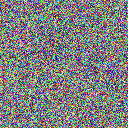

In [4]:
Image.fromarray(img)

In [5]:
rimg = np.zeros((128, 128, 3), dtype='u1')
rimg[:] = (255, 0, 0)
bimg = np.zeros((128, 128, 3), dtype='u1')
bimg[:] = (0, 0, 255)
gimg = np.zeros((128, 128, 3), dtype='u1')
gimg[:] = (0, 255, 0)

In [6]:
primg, pgimg, pbimg = map(Image.fromarray, (rimg, gimg, bimg))

In [7]:
imgutils.crop_center(Image.fromarray(img), (20, 40))

In [8]:
d = imgutils.ImgDims(20, 40)

In [9]:
imgutils.crop_center(Image.fromarray(img), d)

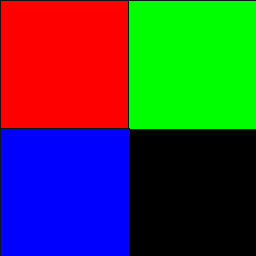

In [10]:
imgutils.square_montage((primg, pgimg, pbimg))

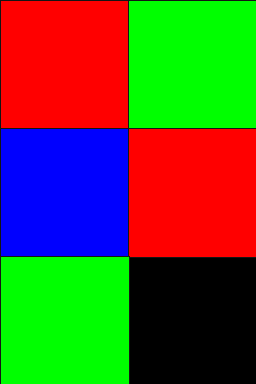

In [11]:
imgutils.square_montage((primg, pgimg, pbimg, primg, pgimg))

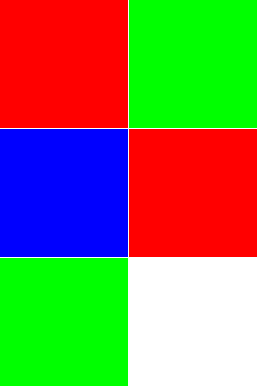

In [12]:
montage = imgutils.montage((primg, pgimg, pbimg, primg, pgimg), 3, 2)
montage

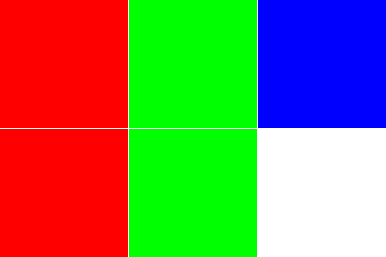

In [13]:
imgutils.montage((primg, pgimg, pbimg, primg, pgimg), 2, 3)

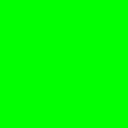

In [14]:
pgimg

In [15]:
tensor1 = imgutils.images_to_tensor4((primg, pgimg, pbimg, primg, pgimg))
tensor1.shape

(5, 3, 128, 128)

In [16]:
tensor2 = imgutils.images_to_tensor4((primg, pgimg, pbimg, primg, pgimg), 'nhwc')

In [17]:
tensor1.shape, tensor2.shape

((5, 3, 128, 128), (5, 128, 128, 3))

In [37]:
list1 = imgutils.tensor4_to_images(tensor1)
list1

[<PIL.Image.Image image mode=RGB size=128x128 at 0x7FCED811BC90>,
 <PIL.Image.Image image mode=RGB size=128x128 at 0x7FCED811BB10>,
 <PIL.Image.Image image mode=RGB size=128x128 at 0x7FCED811B790>,
 <PIL.Image.Image image mode=RGB size=128x128 at 0x7FCED811B3D0>,
 <PIL.Image.Image image mode=RGB size=128x128 at 0x7FCED811B690>]

In [40]:
list2 = imgutils.tensor4_to_images(tensor2, order='nhwc')
list2

[<PIL.Image.Image image mode=RGB size=128x128 at 0x7FCED80760D0>,
 <PIL.Image.Image image mode=RGB size=128x128 at 0x7FCED8076150>,
 <PIL.Image.Image image mode=RGB size=128x128 at 0x7FCED8076190>,
 <PIL.Image.Image image mode=RGB size=128x128 at 0x7FCED8063CD0>,
 <PIL.Image.Image image mode=RGB size=128x128 at 0x7FCED8076110>]

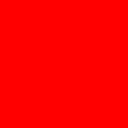

In [38]:
list1[0]

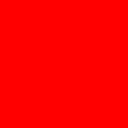

In [41]:
list2[0]

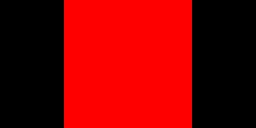

In [19]:
imgutils.letterbox_resize(primg, (256, 128))

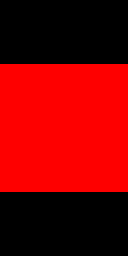

In [20]:
imgutils.letterbox_resize(primg, (128, 256))

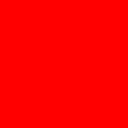

In [21]:
primg.thumbnail((256, 128))
primg

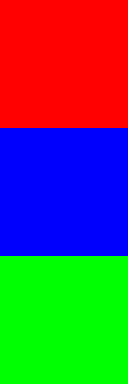

In [22]:
imgutils.hstack((primg, pbimg, pgimg))

In [23]:
limg = np.zeros((100, 120), dtype='u1')

In [24]:
limg[:,:40] = 1
limg[:,40:80] = 2
limg[:,80:] = 3

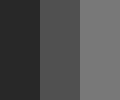

In [25]:
Image.fromarray(limg*40)

In [26]:
l2rgb = {1: (255, 0, 0), 2: (0, 255, 0), 3: (0, 0, 255)}

In [27]:
rgbimg = imgutils.label_image_to_rgb_image(limg, l2rgb, default=(0, 0, 0))

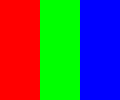

In [28]:
Image.fromarray(rgbimg)

In [29]:
rgb2l = {v: k for (k, v) in l2rgb.items()}

In [30]:
limg2 = imgutils.rgb_image_to_label_image(rgbimg, rgb2l)

In [31]:
np.all(limg2 == limg)

True

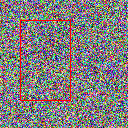

In [32]:
pimg = Image.fromarray(img)
imgutils.draw_bbox(pimg, (20, 20, 20+50, 20+80), width=1)
pimg

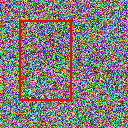

In [33]:
pimg = Image.fromarray(img)
imgutils.draw_bbox(pimg, (20, 20, 20+50, 20+80), width=2)
pimg